## 1.Download The Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load The Dataset

In [5]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

## 3. Perfrom Below Vistualization

### Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

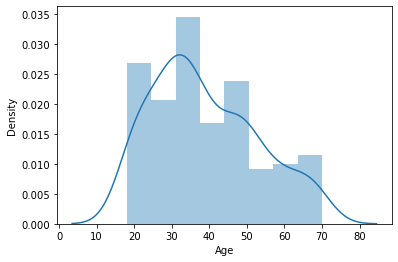

In [7]:
sns.distplot(df.Age)

## Bi-variate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Gender'>

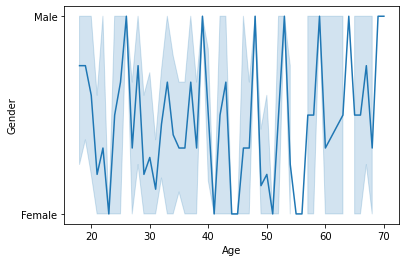

In [8]:
sns.lineplot(df.Age,df.Gender)

<AxesSubplot:ylabel='Age'>

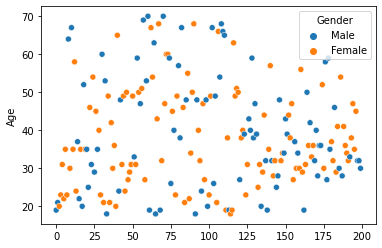

In [9]:
sns.scatterplot(x=df.index,y=df['Age'],hue=df['Gender'])

## Multi-variate Analysis

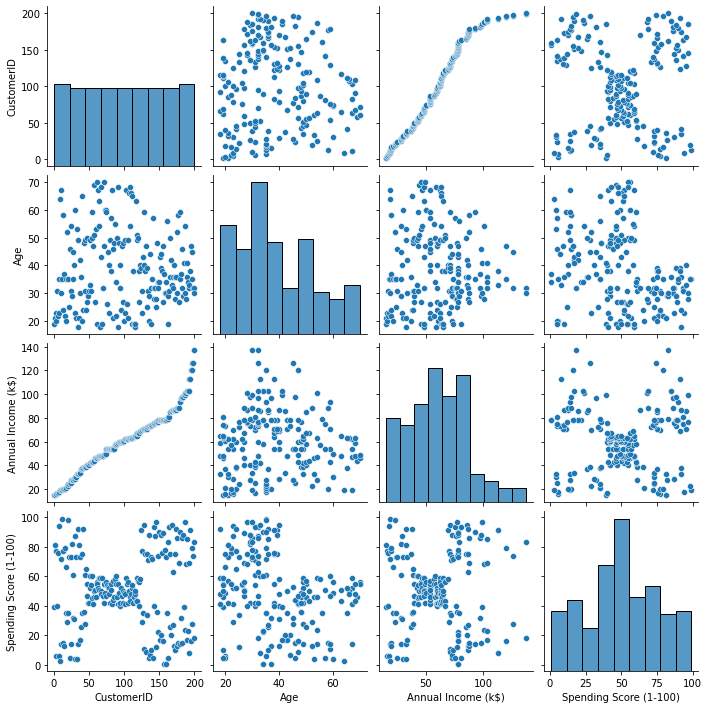

In [10]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

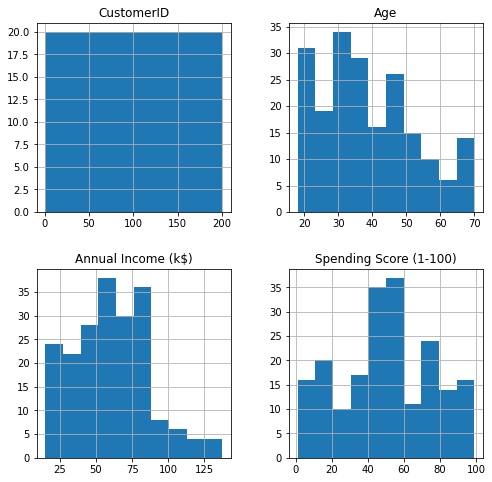

In [11]:
df.hist(figsize=(8,8))

## 4.Descriptive statistics

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

## 5.Missing Values

In [14]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## 6.Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

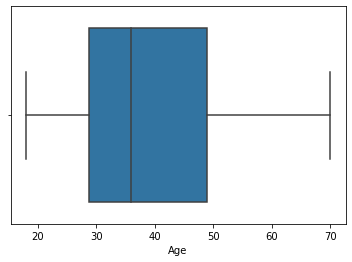

In [15]:
sns.boxplot(df.Age)

In [16]:
q1=df.CustomerID.quantile(0.25)
q3=df.Age.quantile(0.75)

In [17]:
IQR=q3-q1

In [18]:
upper_limit = q3 + 1.5 * IQR
lower_limit = q1- 1.5 * IQR

In [19]:
upper_limit

46.375

In [20]:
df.mean()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_1124\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [21]:
df['Age'] = np.where(df['Age']>upper_limit,11,df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

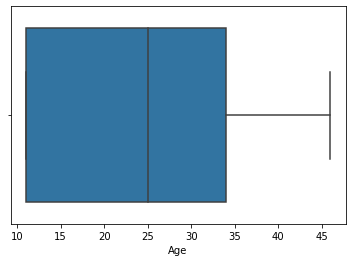

In [22]:
sns.boxplot(df.Age)

## 7. Checking Categorical Column And Perform Encoding

### 1.Label Encoding

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [28]:
df.Gender=le.fit_transform (df.Gender)

In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 2.One hot encoding

In [30]:
df_main=pd.get_dummies(df,columns=['Gender'])
df_main

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [31]:
df_main.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
CustomerID,1.000000,0.255089,0.977548,0.013835,-0.057400,0.057400
Age,0.255089,1.000000,0.243595,0.163570,0.105326,-0.105326
Annual Income (k$),0.977548,0.243595,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),0.013835,0.163570,0.009903,1.000000,0.058109,-0.058109
Gender_0,-0.057400,0.105326,-0.056410,0.058109,1.000000,-1.000000
Gender_1,0.057400,-0.105326,0.056410,-0.058109,-1.000000,1.000000


<AxesSubplot:>

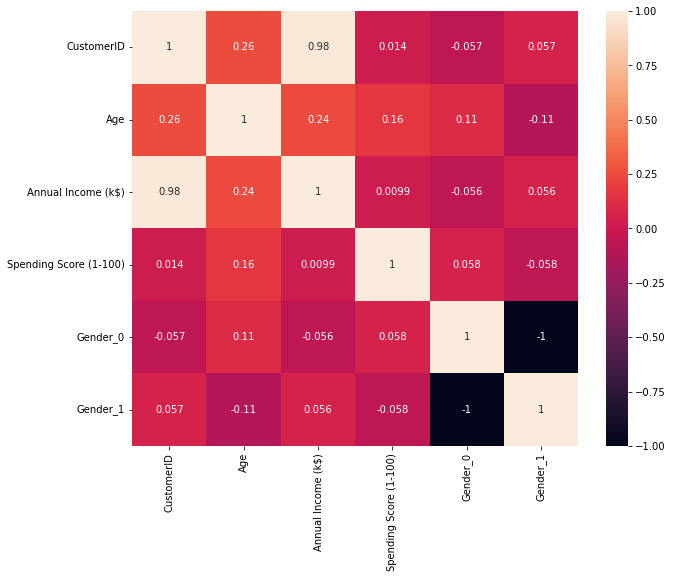

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot=True)

In [56]:
df.corr().Gender

CustomerID                0.057400
Gender                    1.000000
Age                      -0.105326
Annual Income (k$)        0.056410
Spending Score (1-100)   -0.058109
Name: Gender, dtype: float64

In [57]:
X=df.iloc[:,:-1]
y=df.Gender

## 8. Scaling the data

In [50]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame(scale(X),columns=X.columns)

In [51]:
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-0.504088,-1.738999
1,-1.706091,1.128152,-0.325650,-1.738999
2,-1.688771,-0.886405,-0.414869,-1.700830
3,-1.671450,-0.886405,-0.147211,-1.700830
4,-1.654129,-0.886405,0.566541,-1.662660


In [44]:
y.tail()

195    0
196    0
197    1
198    1
199    1
Name: Gender, dtype: int64

## 9. Perform any of the clustering algorithms

In [136]:
new_df =df.iloc[:,:-1]
new_df.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [137]:
new_df.shape

(200, 4)

In [138]:
from sklearn import cluster 

In [139]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [140]:
error

[829102.06,
 239518.5,
 123435.46744782876,
 81473.84184806648,
 58352.738511488504,
 48076.55504921128,
 39802.175952116115,
 35118.10158247799,
 31474.890279503106,
 27832.660363637406]

In [141]:
import matplotlib.pyplot as plt

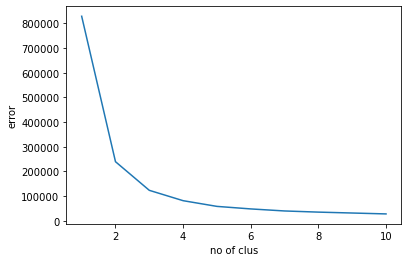

In [142]:
plt.plot(range(1,11),error)
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

## 10. Add the cluster data with the primary dataset

In [54]:
from sklearn import cluster

In [106]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [107]:
km_model.fit(new_df)

KMeans(n_clusters=3, random_state=0)

In [108]:
pred=km_model.predict(new_df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [110]:
km_model.predict([[1.1,1.2,1.3,2.2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

## 11. Split the data into dependent and independent variables.

In [42]:
y=df_main['Annual Income (k$)']
y

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [44]:
X=df_main.drop(columns=['Annual Income (k$)'],axis=1)
X

,CustomerID,Age,Spending Score (1-100),Gender_Female,Gender_Male
0,1,2,39,0,1
1,2,4,81,0,1
2,3,3,6,1,0
3,4,6,77,1,0
4,5,14,40,1,0
...,...,...,...,...,...
195,196,18,79,1,0
196,197,28,28,1,0
197,198,15,74,0,1
198,199,15,18,0,1


## 12. Split the data into training and testing

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [59]:
X_train.shape

(140, 4)

In [60]:
y_train.shape

(140,)

In [61]:
X_test.shape

(60, 4)

In [62]:
y_test.shape

(60,)

In [63]:
y_train

131    1
96     0
181    0
19     0
153    0
      ..
67     0
192    1
117    0
47     0
172    1
Name: Gender, Length: 140, dtype: int64

In [64]:
y_test

18     1
170    1
107    1
98     1
177    1
182    1
5      0
146    1
12     0
152    0
61     1
125    0
180    0
154    0
80     1
7      0
33     1
130    1
37     0
74     1
183    0
145    1
45     0
159    0
60     1
123    1
179    1
185    1
122    0
44     0
16     0
55     1
150    1
111    0
22     0
189    0
129    1
4      0
83     0
106    0
134    1
66     0
26     0
113    1
168    0
63     0
8      1
75     1
118    0
143    0
71     0
124    0
184    0
97     0
149    1
24     0
30     1
160    0
40     0
56     0
Name: Gender, dtype: int64

## 13. Build the Model

In [65]:
from sklearn.linear_model import LinearRegression

In [93]:
MLR= LinearRegression()

In [94]:
MLR.fit(X_test,y_test)

LinearRegression()

In [96]:
pred=MLR.predict(X_train)
pred

array([ 1.00000000e+00, -5.17173552e-16,  2.13720131e-14, -1.91177723e-14,
        1.26097575e-14,  1.00000000e+00, -1.03298878e-14,  1.42086128e-14,
        1.00000000e+00, -2.50460685e-15,  9.72743085e-15, -1.44318000e-15,
        1.00000000e+00,  6.43076550e-16,  1.00000000e+00, -1.87507017e-15,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -1.21196746e-14,  1.00000000e+00,  3.05826110e-14,
        1.00000000e+00, -8.20703410e-15, -2.39619033e-14,  1.00000000e+00,
        9.59749453e-15,  1.00000000e+00, -1.16389882e-14,  1.00000000e+00,
        2.91515201e-14, -6.12077755e-15,  3.32349472e-14,  1.00000000e+00,
        1.76704491e-14,  1.00000000e+00,  7.96180061e-16,  3.89506728e-15,
        1.00000000e+00,  2.43586471e-14, -1.10582477e-14,  1.00000000e+00,
        4.50914109e-16,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.63802626e-14,  1.00000000e+00, -6.01647022e-15, -1.07129818e-14,
       -1.09228273e-14,  

In [104]:
Age=pd.DataFrame({'Actual_y_value':y_test,'Predicted_y_value':y_prediction})

In [105]:
Age

,Actual_y_value,Predicted_y_value
18,1,1.000000e+00
170,1,1.000000e+00
107,1,1.000000e+00
98,1,1.000000e+00
177,1,1.000000e+00
182,1,1.000000e+00
5,0,1.994253e-14
146,1,1.000000e+00
12,0,1.864512e-14
152,0,-1.059201e-14


## 14. Train the Model

In [72]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [73]:
Model.fit(X_train,y_train)

LinearRegression()

In [74]:
train_pred=Model.predict(X_train)
train_pred

array([ 1.00000000e+00, -1.11022302e-16, -4.99600361e-16, -2.77555756e-16,
       -4.44089210e-16,  1.00000000e+00, -5.55111512e-17, -3.33066907e-16,
        1.00000000e+00, -1.11022302e-16, -4.44089210e-16, -1.11022302e-16,
        1.00000000e+00, -1.11022302e-16,  1.00000000e+00, -1.11022302e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -1.11022302e-16,  1.00000000e+00, -6.10622664e-16,
        1.00000000e+00, -5.55111512e-17, -1.11022302e-16,  1.00000000e+00,
       -4.99600361e-16,  1.00000000e+00, -3.33066907e-16,  1.00000000e+00,
       -3.33066907e-16, -1.11022302e-16, -7.77156117e-16,  1.00000000e+00,
       -3.88578059e-16,  1.00000000e+00, -4.44089210e-16, -4.44089210e-16,
        1.00000000e+00, -4.99600361e-16, -5.55111512e-17,  1.00000000e+00,
       -3.88578059e-16,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -4.44089210e-16,  1.00000000e+00, -3.88578059e-16, -3.33066907e-16,
       -3.33066907e-16,  

## 15. Test the Model

In [75]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [76]:
Model.fit(X_test,y_test)

LinearRegression()

In [77]:
test_pred=Model.predict(X_test)
test_pred

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -5.55111512e-16,  1.00000000e+00,
       -5.55111512e-16, -1.11022302e-16,  1.00000000e+00, -1.11022302e-16,
        1.66533454e-16, -1.11022302e-16,  1.00000000e+00, -6.10622664e-16,
        1.00000000e+00,  1.00000000e+00, -3.88578059e-16,  1.00000000e+00,
        2.22044605e-16,  1.00000000e+00, -3.33066907e-16, -1.66533454e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -1.11022302e-16, -3.33066907e-16, -6.10622664e-16,  1.00000000e+00,
        1.00000000e+00, -1.66533454e-16, -4.99600361e-16,  2.77555756e-16,
        1.00000000e+00, -5.55111512e-16, -2.22044605e-16, -1.66533454e-16,
        1.00000000e+00, -2.22044605e-16, -4.99600361e-16,  1.00000000e+00,
        0.00000000e+00, -2.77555756e-16,  1.00000000e+00,  1.00000000e+00,
       -1.11022302e-16, -1.11022302e-16, -2.77555756e-16, -1.11022302e-16,
        2.22044605e-16, -

## 16. Measure the performance using Evaluation Metrics.

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score,mean_squared_error
from sklearn.linear_model import LinearRegression

In [82]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [83]:
y_prediction=regression.predict(X_test)

In [84]:
cutoff=0.7
y_prediction_classes=np.zeros_like(y_prediction)
y_prediction_classes[y_prediction>cutoff]=1

In [85]:
y_test_classes=np.zeros_like(y_test)
y_test_classes[y_test>cutoff]=1

In [86]:
confusion_matrix(y_test_classes,y_prediction_classes)

array([[34,  0],
       [ 0, 26]], dtype=int64)

In [87]:
pd.crosstab(y_test_classes,y_prediction_classes)

col_0,0.0,1.0
row_0,,
0,34,0
1,0,26


In [88]:
accuracy_score(y_test_classes,y_prediction_classes)

1.0

In [89]:
print(mean_squared_error(y_test,y_prediction))

1.452996643891435e-28


In [90]:
print(classification_report(y_test_classes,y_prediction_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
probability=roc_auc_score(y_test_classes,y_prediction_classes)
probability

1.0